In [1]:
%matplotlib inline
import Functions.Visualization as viz
from ipywidgets import interact, interactive, fixed, interact_manual

from Functions import Robot 
import os
import sys
import time
import numpy as np
import math as m
import pandas as pd
import math as m

from Functions import Utilities 
# Import the necessary packages and modules
import matplotlib.pyplot as plt

ut = Utilities.Utilities()

v = viz.Visualization()

# STATE MACHINE OF THE ROBOT : 

The thymio have 4 states: 

    Init : in this state the thymio is at rest until the vision algorithm find it's position and that an optimal path has been computed.
    
    Astolfi : In this state the robot will move to the goal using an astolfi controller with constant speed. 
    
    Turn : In this state the robot will turn on itself until it points close to the next goal.
    
    Local: In this state the robot get around the local obstacle. 
    
Thymio state machine :

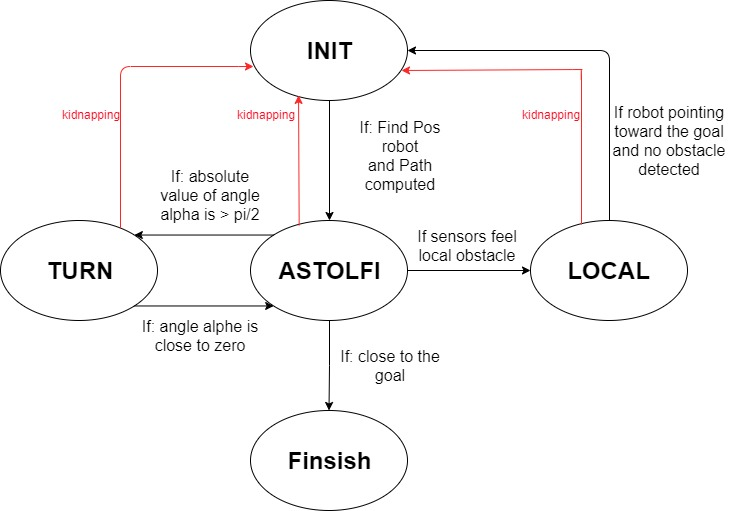

In [ ]:
Figure 1: Thymio S

The thymio start in Init mode, when it receive all the data necessary to go to the goal it will move in Astolfi State. In this state the value given to the motor of the left wheel and right wheel will be computed using an astolfi closed control loop. It will move to state TURN if the angle $\alpha$ (more detailled in Astolfi section) is higer than $\frac{\pi}{2}$. Once it is in state TURN it will turn on itself until the absolute value of 

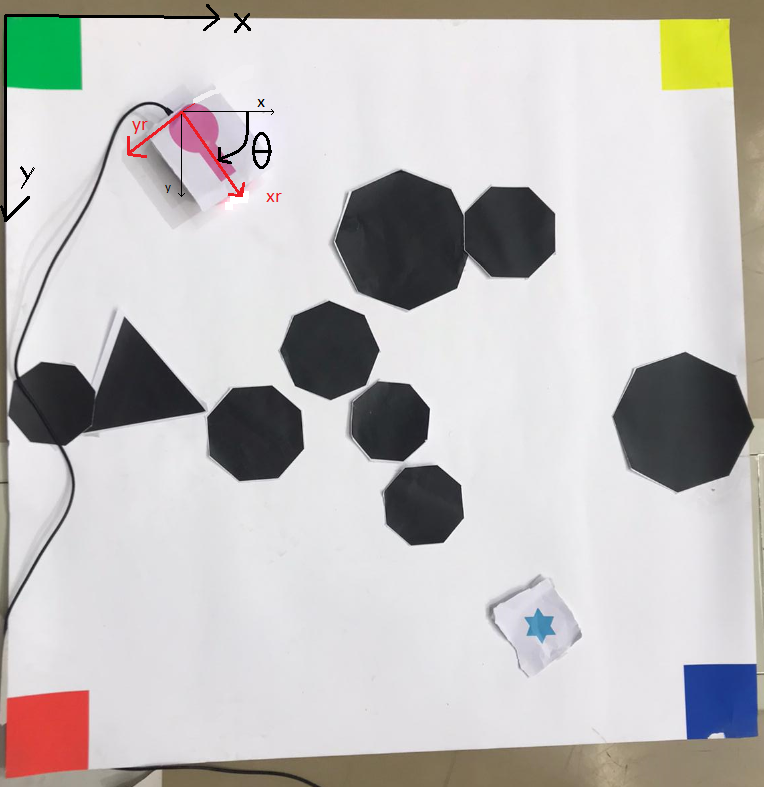

## STATE  INIT : 

In the Init State the robot will stay at rest and will stay in this state until in receive it's position by the camera and a liste of tuple with the points that forms the shortest path (calculate in the Global.py module). 

In [ ]:
# Function for the init state : 

def INIT(self,global_path, pos_init) : 
        ''' the robot stays in INIT state until it gets a global path and an initial position
        global path : give false if no global path else it gives the global path in a tuple
        pos_init: the initial position (x,y,theta)'''

    self.state = 'INIT'
    if global_path is not False :
        self.global_path = global_path
    else :
        return self.state
    if pos_init is not False :
        self.Pos = pos_init
    else : 
        return self.state
    # If a Pos and a global_path has been found enter in ASTOLFI mode
    self.node = 0
    self.state = 'ASTOLFI'
    return self.state

## State ASTOLFI : 


### Description of the parameters : 

In this state, the robot will follow the trajectory of the shortest path using the astolfi controller with the parameters ($\alpha$, $\beta$, $\rho$). The goal for this controller will be equal to the next node that the thymio must reach in the shortest path and once the distance between the thymio and the goal is lower than 3 cm ($\rho<3$) we give to the thymio a new goal equal to next node in the shortest path. We repeat this operation until the thymio reach the final node of the shortest path (the GOAL).

Here is a schema that shows those parameters

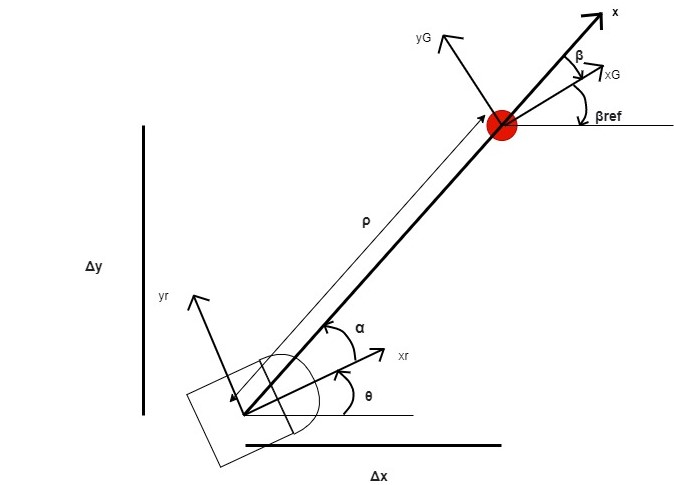

The values for alpha beta and rho are : 


$\alpha = atan2(\Delta y,\Delta x)-\theta$ in [rad]

$\rho=\sqrt{\Delta x^2+\Delta y^2}$ in [cm]

$\beta=\alpha-\theta-\beta_{ref}$ in [rad]

$\beta_{ref}$ will be computed each time the thymio reach a node of the shortest path and it's value will be equal to the angle between the x axis and the line connecting the two node of the shortest path where the thymio is. For exemple, if the thymio is between the first node and the second node of the shortest path. $\beta_{ref}$ will be equal to the angle between the x axis and the line connecting node one and node two of the shortest path. 

### closed loop control law  : 

We decided to apply an astolfi controller with constant linear speed (the formula come from lecture 1 of the course, we devided by rho to get constant speed): 

$v=k_{\rho}$  
    
$\omega=\frac{k_{\alpha} \alpha + k_{\beta} \beta}{\rho} $

And the closed loop system will be equal to : 
$
\begin{bmatrix}
\dot{\rho}\\ 
\dot{\alpha}\\ 
\dot{\beta}
\end{bmatrix}=\begin{bmatrix}
-k_{\rho}\\ 
(k_{\rho}\alpha-k_{\alpha}\alpha -k_{\beta}\beta)/ \rho\\ 
(-k_{\rho}sin\alpha)/\rho
\end{bmatrix}
$

(We get a singularity point when $\rho$ to avoid this problem we will stop the robot when $\rho<3 cm$) 

A function in the module class Robot have been created to simulate the trajectory of the robot with this controller givan an path and different values for parameters $\alpha$, $\beta$ and $\rho$ : 



### Test of the controller : 

node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0
node
 0


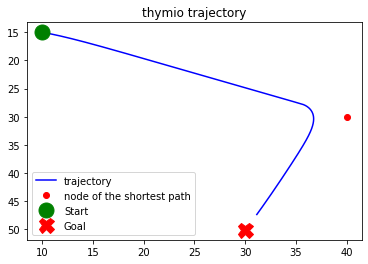

In [24]:

#Those Parameters can be modified to test our Controller

############################################################################################################



global_path = [(10.,15.),(40.,30.),(30.,50.1)] # Point of the global path [(xstart,ystart),....,(xgoal,ygoal)]

InitAngle=m.pi/10
kp = 3 
ka = 35 
kb = -8 
##############################################################################################################

# Initialise robot class
Init_pos = np.array([global_path[0][0],global_path[0][1],InitAngle])
Ts = 0.01


vTOm=30.30
wTOm=(200*180)/(80*m.pi)  

# INIT PARAMETERS FOR THE ROBOT : 
thym = Robot.Robot(global_path,Init_pos,Ts, kp,ka,kb,vTOm,wTOm)

# SIMULATION OF THE ASTOLFI CONTROLLER
thym.compute_path(Ts)


# PLOT THE PATH : 

Startx=global_path[0][0]
Starty=global_path[0][1]
Goalx=global_path[-1][0]
Goaly=global_path[-1][1]


plt.plot(thym.pathcontrolx, thym.pathcontroly, 'b-',label="trajectory")
plt.plot(thym.Global_x,thym.Global_y,'ro',label="node of the shortest path")
plt.plot(Startx,Starty,'go',markersize=15,label="Start")
plt.plot(Goalx,Goaly,'rX',markersize=15,label="Goal")

# Add a legend
plt.title('thymio trajectory')

# y axis down : 
plt.gca().invert_yaxis()
plt.legend()#'trajectory','node of the shortest path','Start','Goal')
# Show the plot : 
plt.show()

By testing different values for $k_{\rho}$, $k_{\alpha}$ and $k_{\beta}$, we decided to keep : 

$k_{\rho}=3$

$k_{\alpha}=35$

$k_{\beta}=-8$

With those parameter we ensure that the robot have a smooth trajectory and will turn close to he node of the global path so that they avoid going inside global obstacles. 

### Advantages and Limitation of the Astolfi controller:  

**Advantages**: This controller allows the robot to have a smooth trajectory

The parameters $k_{\alpha}$, $k_{\beta}$ and $k_{\rho}$ can be easily changed and it is therefore easy to adapt our controller at different situation (to deal with the delay of the bluetooth, we diminished the the values of thoses parameters). 

**Limitation** :Making some test on the thymio on a real map with global obstacle we observe that this controllers work well. 
Nevertheless some case exist where this controller is not suitable : 

If a thymio with bluetooth is used, we have to reduce the parameters $k_{\alpha}$,$k_{\beta}$ (and $k_{\rho}$). Since we have some delay and that we use the measurement of the position and angle of the robot by the camera in our filter, we have to reduce our severity on the angular error (this could lead to ondulation in the robot trajectory) 

Moreover if $\rho$ is too small and $\alpha$ is too big, we could have some large angular velocity that the thymio couldn't handle. 
To avoid this problem, we decide that the thymio move to the next goal when it's distance to the actual goal is lower than 5cm.

Moreover, this controller works when $\frac{-\pi}{2}<\alpha<\frac{\pi}{2}$. To make our robot works in every situtation we add to the thymio the state :TURN ON ITSELF when $\alpha$ is not in the bound. 

In [ ]:
# Function for the Astolfi controller : 

    def ASTOLFI(self,th,Ts,filter,pos_cam, update_cam):
        ''' Astolfi controller with constant speed is used to control the robot when the angle alpha is between -pi/2 and pi/2
             th : serial link to the thymio
             Ts : time of one iteration of the loop while (we recompute every Ts)
             filter: a kalman filter is used using the measurement of the left and right motor and the measurement of the camera
             pos_cam: measurement of the camera'''
        
        #[give : x,y,theta,vr,vl] to the filter : 
        vect = self.get_states()

        # check if we detect a local obstacle
        self.check_localobstacle(th)
        
        if self.state == 'LOCAL' :
            return self.state

        # converting x,y and theta in rho, beta and alpha (Astolfi controller)
        self.compute_pba()

        if abs(self.a)>m.pi/2:
            # calculate rho, beta and alpha at time t+1(Astolfi controller)
            self.state='TURN'
            return self.state

        #  Check for kidnapping 

        elif pos_cam is not False and pos_cam[0] != 0 and np.linalg.norm(pos_cam[0:2] - vect[0:2],2) > 10.:
            self.state = 'INIT'
            th.set_var('motor.left.target',0)
            th.set_var('motor.right.target',0)
            time.sleep(3)
            return self.state
        
        # If no kidnapping and a correct angle alpha : 

        else :
            # compute rho, alpha and beta at time t+ts
            self.compute_state_equation(Ts)
            # convert rho, beta and alpha in x y and theta (need those parameters for the filter)
            self.compute_Pos()
            # check if we are close to the next point in the global path and change the next goal in the astolfi controller if it is the case
            self.check()
            # calculate the velocity and angular velocity and the value we need to give to the left and right motor
            self.compute_input()

            # give the value of the motor to the thymio 
            self.run_on_thymio(th)

            #[give : x,y,theta,vr,vl] to the filter : 
            vect = self.get_states()

            # sleep 0.1 second :
            time.sleep(0.1)

            # get our pos with the filter
            filter.compute_kalman(pos_cam,vect,th,Ts,update_cam)
            return self.Pos

## State TURN ON ITSELF : 

In the state TURN ON ITSELF, the robot will turn with a constant angular velocity and with no linear velocity. It will go back in Astolfi state when $|\alpha|<0.1$ [rad]

In [ ]:
    def TURN(self,th,Ts,filter, pos_cam, update_cam):

        '''if abs(alpha)>pi/2 we can't use astolfi and we first need to rotate the robot on itslef. We make it turn on  itself until alpha 
            is close to 0
           th : serial link to the thymio
           Ts : time of one iteration of the loop while (we recompute every Ts)'''
        

        vect = self.get_states()
        
        #  Check for kidnapping 
        if pos_cam is not False and pos_cam[0] != 0 and np.linalg.norm(pos_cam[0:2] - vect[0:2],2) > 10.:
            self.state = 'INIT'
            th.set_var('motor.left.target',0)
            th.set_var('motor.right.target',0)
            time.sleep(3)
            return self.state
        
        # estimate the new position of the robot at time t+Ts:
        
        self.compute_rotation(Ts)
        
        # calculate the angular velocity and the value we need to give to the left and right motor
        self.compute_input()

        # give the value of the motor to the thymio 
        self.run_on_thymio(th)

        # sleep 0.1 second :
        time.sleep(0.1)

        #[give : x,y,theta,vr,vl] to the filter : 
        vect = self.get_states()

        # sleep 0.1 second :
        time.sleep(0.1)

        # get our pos with the filter
        filter.compute_kalman(pos_cam,vect,th,Ts,update_cam)

## State LOCAL AVOIDANCE

The robot enter in this state when it's horizontal sensors feels an obstacle close to him. To consider that the obstacle is close to the robot we test if the values of the different sensors are above a treshold (the treshold will be different depending on the sensor). Once it feels the obstacle it will start turning on itself in the left direction if it feels the obstacle on the right or in the right direction if it feels the obstacle on the left.

In [25]:
    #PORTION OF THE CODE THAT CHECK IF THERE IS A LOCAL OBSTACLE 
    
    self.sensor= np.array(th["prox.horizontal"]) #get values from the sensors
        if self.sensor[0]>1000 or self.sensor[1]>1000 or self.sensor[2]>3000 or self.sensor[3]>1000 or self.sensor[4]>1000: # threshold a modifi� 
            self.state='LOCAL'
            right=self.sensor[4]+self.sensor[3]   #values of the right self.sensors   
            left=self.sensor[0]+self.sensor[1]    #values of the left self.sensors
            if right>left:              #turn right if it feels the object on the left
                self.turn=0
                self.idx_sensor=(3,4)
            else:                       #turn left if it feels the object on the right 
                self.turn=1
                self.idx_sensor=(1,0)

IndentationError: unexpected indent (<ipython-input-25-75937e146d50>, line 4)

Once the thymio enter in LOCAL AVOIDANCE STATE it will alternate between 3 types of displacement. Turn Left on itself, Turn right on itself or going straight. 

For the explanation we will assume that thymio found an obstacle on it's left (if the obstalce is on the right the direction of th turn will be the opposite). 

### Turn right :

If the thymio found an obstacle on it's left it will turn right on itslef with an angular velocity equal to $\omega=0.3$ [rad/s] until it doesn't feel any obstacle on it's horizontal sensor and will start going straight.

### Going Straigt :

It will start going staight at constant linear velocity during 2 seconds at 2cm/s (The range of the sensor are above 4 cm and we are sure that no obstacle on this distance. After 2 second it will start turning left.

### Turning Left : 

The thymio will then turn left with an angular velocity equal to $\omega=0.3$ [rad/s] until it feels again the obstacle and will go back in the mode turning right and the loop will repeat. 

### Getting out of the local avoidance mode : 

This loop of three displacement allow the robot to stay close the obstacle and to go aroud it. It will get out the LOCAL AVOIDANCE state if the robot is pointing toward the current goal. 



In [ ]:
# PART OF THE CODE THAT WILL CHECK IF WE CAN GO OUT LOCAL AVOIDANCE STATE 

#angle correspond to the angle between x axis and the line that link the robot and the goal 
angle=ut.compute_angle(self.Pos[0:2],self.global_path[self.node+1])

#test is the difference between the angle theta of the robot and angle calculate above (value in [-pi pi]) 
test=(m.pi+self.Pos[2]-angle)%(2*m.pi)-m.pi
if abs(test)<0.1:
    self.state='INIT'

### recompute a path : 

Once the thymio detect that the obstacle has been passed. It will return in INIT state and a new path will be recomputed. 
Since our thymio deviate from it's original trajectory due to the local obstacle, recompute a path allow us to check if a new shortest path has not been found. 

**Advantages**: 
This method of local avoidance is easy to implemented and can be used for different types of obstacle. 

If we remove the local obstacle or if the thymio feels an obstacle at a place where there is none, the thymio will turn on itself until it points toward the current goal and will therefore go out the LOCAL state.  


**Limitation** : 
Sometimes, the robot will return in Init mode even if the obstacle is still too close from the robot but this is not a problem since the robot will go back directly again in LOCAL state

The local obstacle must not be put close to a node of the global path. Since in LOCAL state it will not detect that it passed the current goal and that it must go to the next goal and will therefore try to back to the old goal. The thymio will therefore make a detour. If the obstacle is on the current goal of the thymio, the thymio will turn around the local obstacle 
until it is removed. 

In LOCAL AVOIDANCE MODE, the thymio don't take into accound the global obstacle and it is therefore important to put the local obstacle at a place where the thymio could not encounter those obstacles. 


In [ ]:
    def LOCAL(self,th,Ts, filter, pos_cam, update_cam):
        ''' we get around the local obstacle  until we we don't detect any obstacle in front of the robot when the robot is oriented 
        in the direction of the goal
        the robot will enter in init mode until we recompute a global path.
        TO get around the obstacle the robot will use 3 movements: go straight turn left and turn right. it turn first to avoid
        the obstace then goes straight during 2 second then turn in the other size to see if we are still close to the obstacle. 

        th : serial link to the thymio
        Ts : time of one iteration of the loop while (we recompute every Ts)
        '''


        #check for kidnapping : 
        vect = self.get_states()
        if pos_cam is not False and pos_cam[0] != 0 and np.linalg.norm(pos_cam[0:2] - vect[0:2],2) > 10.:
            self.state = 'INIT'
            th.set_var('motor.left.target',0)
            th.set_var('motor.right.target',0)
            time.sleep(3)
            return self.state

        #turn left if the obstacle is on the right or turn right is the obstacle is on the left until the sensors don't sense the obstacle anymore
        if self.locstate==0: 
            w=0.3
            if self.turn==0: #turn left
                self.u[0]=0
                self.u[1]=-w
            else:
                self.u[0]=0  #turn right
                self.u[1]=w
            self.compute_rot_local(Ts,self.u[1])
            self.checkstate0(th)
            self.cnt=1

        # go straight during 20 loop :
        if self.locstate==1:
            self.cnt=self.cnt+1
            self.u[0]=2 # go straight
            self.u[1]=0
            # go straight
            self.compute_straight_local(Ts,self.u[0])
            if self.cnt==20:
                self.locstate=2
            self.checkout(th)
           
        # turn right until it sense the obstacle to stay close to the obstacle 
        if self.locstate==2:
            w=0.3
            if self.turn==0: #turn right
                self.u[0]=0
                self.u[1]=w
            else:
                self.u[0]=0  #turn left
                self.u[1]=-w
            #compute rotation
            self.compute_rot_local(Ts,self.u[1])

            #check if we still need to turn right or if we can turn left
            self.checkstate2(th)
            #check if we are still in local avoidance or if we can go back in global navigation
            self.checkout(th)

        # calculate the velocity and angular velocity and the value we need to give to the left and right motor
        self.compute_input()

        # give the value of the motor to the thymio 
        self.run_on_thymio(th)

        # sleep 0.1 second :
        time.sleep(0.1)

        if self.locstate==0:
            #[give : x,y,theta,vr,vl] to the filter : 
            vect = self.get_states()

            # get our pos with the filter
            filter.compute_kalman(pos_cam,vect,th,Ts,update_cam)

## State Finish : 

If the thymio is close to the last node of the global path (the GOAL) with $\rho<3$ the thymio will stop the motor and will announce that it arrive at it's objective. 

In [ ]:

    def FINISH(self,th, go) :
        '''check if we are close enough to the goal to stop'''
        if self.p is not None :
            if self.p<5 and self.node==len(self.global_path)-2:
                th.set_var("motor.left.target", 0)
                th.set_var("motor.right.target", 0)
                print('FININSH!!!!')
                go = 0
        return go

## Kidnapping 

If the thymio is in state TURNIG, ASTOLFI or LOCAL it can be kidnapped and be put at an other place. The kidnapping will be detect thanks to the camera. If the value of the position measured on the camera is too different from the position estimation the thymio will detect that it is an obstacle and will go back in INTI MODE and will wait that a new global path has been computed. 

Condition for Kidnapping : $\sqrt{(x_{measured}-x_{estimated})^2+(y_{measured}-y_{estimated})^2}>10$ [cm]

## Control left and right wheel motors 

In our different state we will calculate a linear velocity in [cm/s] and an angular velocity [rad/s].
Nevertheless the values given to the wheels of the motors are between -500 and +500. 

To get the relation between the linear velocity, angular velocity and values to the motors we introdce two constant : 
        
        vTOm : multiplying this constant by the linear velocity wanted will give us the value we need to give on the left and right wheel.
        wTOm : multiplying this constant by the angular velociy wanted will give us the value we need to give on the left wheel and right wheel (+ for the left wheel and - for the right wheel)
       
Introduce this value allows us to change easily the relation between the velocity and values for the motors since those two constant differs on each thymio. 

By making many measurement we find : 

$vTOm=30.3 $

$wTOm=142  $

Exemple : If we want v=3 [cm/s] and w=0.3 [rad/s]

we will have 

$ML=v*vTOm+w*wTOm= 133.5000$

$MR=v*vTOm-w*wTOm= 48.3000 $

with ML and MR the values given respectively to the left and right motor

## Predict postion : 

we recompute the position of the thymio every 0.1 second.

To compute the new position of the robot when it turn on itself we have the equation (in LOCAL or TURNING state):

$x_{t_{k+1}}=x_{t_{k}}$

$y_{t_{k+1}}=y_{t_{k}}$

$\theta_{t_{k+1}}=\theta_{t_{k}}+\omega dt$

with dt= 0.1

To compute the new position of the robot when the robot is going straight (in LOCAL state) :

$x_{t_{k+1}}=x_{t_{k}}+v \times cos(\theta) dt$

$y_{t_{k+1}}=y_{t_{k}}+v \times sin(\theta) dt$

$\theta_{t_{k+1}}=\theta_{t_{k}}$

To compute the new position of the robot in state ASTOLFI : 

We use the second order runge Kutta equation for the discretisation: 

$x_{t_{k+1}}=x_{t_{k}}+\frac{dt}{2}*f(x_{t_{k}})+\frac{dt}{2}*f(x_{t_{k}}+dt*f(x_{t_{k}}))$  with $\dot{x}=f(x)$

In [ ]:
On python we we use 2 function to compute the prediction position : 

    #correspond to the function f (formula for f can be found above in the Astolfi section) 
def astofli_controller(self,p,a,b):
    ''' compute the derivative of rho beta and alpha'''
    p_dot=-self.kp*m.cos(a)
    a_dot=(self.kp*m.sin(a)-self.ka*a-self.kb*b)/p
    b_dot=(-self.kp*m.sin(a))/p
    return p_dot,a_dot,b_dot

    # compute the estimation of rho beta and alpha at time t+Ts and give a value for v and w (linear and angular velocity)
def compute_state_equation(self,Ts):
    ''' use runge Kutta 2 to get rho alpha and beta at time t+Ts '''
    [p_dot1,a_dot1,b_dot1]=self.astofli_controller(self.p,self.a,self.b)

    p1=self.p+Ts*p_dot1
    a1=self.a+Ts*a_dot1
    b1=self.b+Ts*b_dot1

    [p_dot2,a_dot2,b_dot2]=self.astofli_controller(p1,a1,b1)

    self.p=self.p+Ts/2.*p_dot1+Ts/2.*p_dot2
    self.a=self.a+Ts/2.*a_dot1+Ts/2.*a_dot2
    self.b=self.b+Ts/2.*b_dot1+Ts/2.*b_dot2
        
    self.u[0]=self.kp
    self.u[1]=(self.ka*self.a+self.kb*(self.b))/self.p

When we are in the Astolfi state we will need to convert $\rho$ $\alpha$ and $\beta$ to values in the cartestian coordinate : (x,y,$\theta$) So that we can give those estimation of the position and angle to the Kalman filter. Moreover, the Kalman filter will give us back updated values for x y $\theta$. Therefore we need to be able to find the relation between  ($\rho$,$\alpha$,$\beta$) and (x,y,$\theta$).





Here are the formula to go from ($\rho$,$\alpha$,$\beta$) to (x,y,$\theta$) : 

$x=x_{Goal}-\rho*cos(\beta+\beta_{ref})$ [cm]

$y=y_{Goal}+\rho*sin(\beta+\beta_{ref})$ [cm]

$\theta=-\beta-\beta_{ref}-\alpha$ [rad]

those formulas are implemented in the function : compute_pos() in the class Robot

Here are the formula to go from (x,y,$\theta$) to ($\rho$,$\alpha$,$\beta$)  : 

$\alpha = atan2(\Delta y,\Delta x)-\theta$ in [rad]

$\rho=\sqrt{\Delta x^2+\Delta y^2}$ in [cm]

$\beta=\alpha-\theta-\beta_{ref}$ in [rad]

Those formulas are implemented in the function : compute_pba() in the class Robot : 

# To test the module Global + Local Navigation without Vision : 

A testbench navigation has been made to test the local and global navigation without using the Vision measurements in the Kalman Filter 



In [16]:
# Need to import this to make the test bench work

from Functions import Robot
from Functions import Filtering
from Functions import Thymio
import os
import sys
import numpy as np
import math as m
import time

In [17]:
th = Thymio.Thymio.serial(port="COM3", refreshing_rate=0.1) # change the port depending on the thymio 

time.sleep(3) # To make sure the Thymio has had time to connect

# GET THE GLOBAL PATH WITH THE CAMERA AND THE GLOBAL PATH CLASS : 

#choose the global path 
global_path = [(0.,0.),(500.,0.)] # You can modify the values to get an other global path

# Initialise robot class
Init_pos = np.array([global_path[0][0],global_path[0][1],0])    # to get the init pos of the robot
Ts = 0.1
kp = 1.5 #3    #0.15   #0.5
ka = 18 #35  #0.4    #0.8
kb = -4 #-8   #-0.07  #-0.2

vTOm=30.30
wTOm=(200*180)/(80*m.pi) 





thym = Robot.Robot(global_path,Init_pos,Ts, kp,ka,kb,vTOm,wTOm)



# Initialise Filtering class
Rvel = np.array([[10000, 0.], [0.,10000]])
Hvel = np.array([[0.,0.,0.,1.,0.],[0.,0.,0.,0.,1.]])
Rcam = np.array([[0.000001,0.,0.],[0.,0.000001,0.],[0.,0.,0.000001]])
Hcam = np.array([[1.,0.,0.,0.,0.],[0.,1.,0.,0.,0.],[0.,0.,1.,0.,0.]])

filter = Filtering.Filtering(Rvel, Rcam, thym, Hvel, Hcam,Ts)

thym.go=1


# Begin testbench

pos_cam=False #put to false to don't take into account the vision 
update_cam=False

while thym.go:
    tps1 = time.monotonic() #Use to count the time for one cycle will be use to measure Ts at the next iteration

    # FSM OF THE THYMIO 
    if thym.state =='ASTOLFI' : 
        thym.ASTOLFI(th,Ts, filter,pos_cam,update_cam)
    elif thym.state == 'TURN' :
        thym.TURN(th,Ts,update_cam)
    elif thym.state == 'LOCAL' :
        thym.LOCAL(th,Ts,filter,pos_cam,update_cam)
        
        # Since we give the path and the position directly and that we don't use the camera the thymio will not stay in init mode
    elif thym.state == 'INIT' :
        thym.INIT(global_path,Init_pos)
    
    tps2 = time.monotonic()
    Ts=tps2-tps1

    #print(thym.Pos)
    # check if we arrive at the goal 
    if thym.p<3 and thym.node==len(thym.global_path)-2:
        th.set_var("motor.left.target", 0)
        th.set_var("motor.right.target", 0)
        print('FININSH!!!!')
        tfinal=time.monotonic()

        thym.go=0 #get out of the while loop once we are at destination 






[0. 0. 0.]
[[0.]
 [0.]
 [0.]]
[[0.351]
 [0.   ]
 [0.   ]]
[[ 5.14483739e-01]
 [ 0.00000000e+00]
 [-6.91968398e-07]]
[[ 6.79454431e-01]
 [-1.13946253e-07]
 [-2.76779889e-06]]
[[ 8.42896360e-01]
 [-5.65573683e-07]
 [-5.62973576e-05]]
[[ 1.00674807e+00]
 [-9.75354089e-06]
 [-4.92735128e-05]]
[[ 1.17160515e+00]
 [-1.78662863e-05]
 [-9.97587351e-05]]
[[ 1.33536881e+00]
 [-3.41489663e-05]
 [-7.13177513e-05]]
[[ 1.49967295e+00]
 [-4.58766173e-05]
 [-7.10347032e-05]]
[[ 1.66405501e+00]
 [-5.74953538e-05]
 [-2.11508327e-04]]
[[ 1.82674051e+00]
 [-9.19734953e-05]
 [-1.52910849e-04]]
[[ 1.99353937e+00]
 [-1.17256217e-04]
 [-1.87097482e-04]]
[[ 2.15472521e+00]
 [-1.47618802e-04]
 [-3.50484881e-04]]
[[ 2.31934400e+00]
 [-2.04914207e-04]
 [-6.82363634e-04]]
[[ 2.48460037e+00]
 [-3.17312387e-04]
 [-6.25096405e-04]]
[[ 2.67210034e+00]
 [-4.34252595e-04]
 [-8.73932475e-04]]
[[ 2.81277599e+00]
 [-5.57197159e-04]
 [-1.49193722e-03]]
[[ 2.99954384e+00]
 [-8.36081459e-04]
 [-1.01799228e-03]]
[[ 2.99954384e

[[5.8401944 ]
 [2.04184374]
 [0.56984932]]
[[6.0254305 ]
 [2.16053488]
 [0.56984932]]
[[6.20898264]
 [2.27814701]
 [0.53714932]]
[[6.20898264]
 [2.27814701]
 [0.50414932]]
[[6.20898264]
 [2.27814701]
 [0.47144932]]
[[6.20898264]
 [2.27814701]
 [0.43394932]]
[[6.20898264]
 [2.27814701]
 [0.40124932]]
[[6.20898264]
 [2.27814701]
 [0.36824932]]
[[6.20898264]
 [2.27814701]
 [0.33554932]]
[[6.20898264]
 [2.27814701]
 [0.30284932]]
[[6.20898264]
 [2.27814701]
 [0.26984932]]
[[6.20898264]
 [2.27814701]
 [0.23714932]]
[[6.20898264]
 [2.27814701]
 [0.20414932]]
[[6.20898264]
 [2.27814701]
 [0.17144932]]
[[6.20898264]
 [2.27814701]
 [0.13874932]]
[[6.20898264]
 [2.27814701]
 [0.10574932]]
[[6.24087516]
 [2.27970264]
 [0.06564431]]
[0. 0. 0.]
[[-0.06112336]
 [-0.00298144]
 [-0.01419202]]
[[-0.06112336]
 [-0.00298144]
 [-0.01419202]]
[[-0.01091819]
 [-0.00053256]
 [-0.03102985]]
[[ 2.07081504e-01]
 [-1.68468992e-04]
 [ 1.67014725e-03]]
[0. 0. 0.]
[[-0.05398186]
 [-0.00249815]
 [-0.00124803]]
[[ 0.

Exception in thread Thread-11:
Traceback (most recent call last):
  File "C:\Users\peete\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\peete\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\peete\Documents\EPFL\MASTER_ROBOTIC\mobile robotic\visualsutdiogit\Mobile_Robotics\Functions\Thymio.py", line 340, in do_refresh
    self.get_variables()
  File "C:\Users\peete\Documents\EPFL\MASTER_ROBOTIC\mobile robotic\visualsutdiogit\Mobile_Robotics\Functions\Thymio.py", line 499, in get_variables
    self.send(msg)
  File "C:\Users\peete\Documents\EPFL\MASTER_ROBOTIC\mobile robotic\visualsutdiogit\Mobile_Robotics\Functions\Thymio.py", line 456, in send
    self.io.write(msg.serialize())
  File "C:\Users\peete\Anaconda3\lib\site-packages\serial\serialwin32.py", line 315, in write
    raise SerialException("WriteFile failed ({!r})".format(ctypes.WinError()))
serial.serialutil.SerialException: 

SerialException: WriteFile failed (PermissionError(13, 'Le périphérique ne reconnaît pas la commande.', None, 22))